In [51]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [52]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

In [53]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [54]:
X= data.data
y= data.target


In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [56]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()

In [57]:
L.fit(X_train,y_train)

LinearRegression()

In [58]:
print(L.coef_)
print(L.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [59]:
y_pred=L.predict(X_test)

In [60]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5188113124539249
RMSE 48.72713760953252


In [61]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=20)

In [62]:
R.fit(X_train,y_train)

/Users/shushantkumartiwar/Music/100_days_machine_learning/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/shushantkumartiwar/Music/100_days_machine_learning/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/shushantkumartiwar/Music/100_days_machine_learning/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Ridge(alpha=20)

In [63]:
print(R.coef_)
print(R.intercept_)

[ 10.94269891   1.30363555  35.07731902  27.17710199   9.10188181
   6.66056996 -22.64099974  22.54355231  32.71534846  22.89839356]
151.90908535322652


In [64]:
y_pred1=R.predict(X_test)

In [65]:
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score 0.10882391045486672
RMSE 66.31243243540587


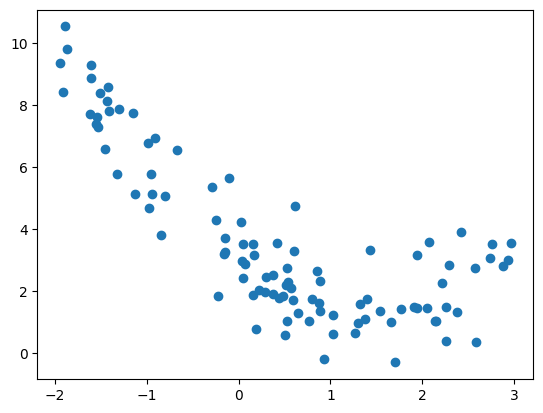

In [66]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

/Users/shushantkumartiwar/Music/100_days_machine_learning/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/shushantkumartiwar/Music/100_days_machine_learning/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/shushantkumartiwar/Music/100_days_machine_learning/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/shushantkumartiwar/Music/100_days_machine_learning/venv/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:292: RuntimeWarning: divide by zero encountered in matmul
  UTy = U.T @ y
/Users/shushantkumartiwar/Music/100_days_machine_learning/venv/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:292: RuntimeWarning: overflow encountered in matmul
  UTy = U.T @ y
/Users/shushantkumartiwar/Music/100_days_machine_learning

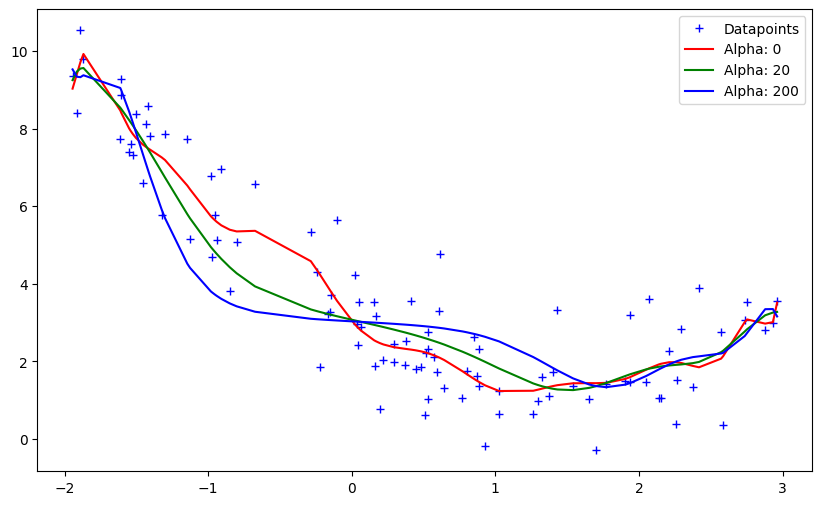

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()